# Word Occurence within Document

This page will walk you through using Textractor to find all the occurrences of the word 'Room' in a document and visualize them overlayed on the document image.

## Installation

To begin, install the `amazon-textract-textractor` package using pip. This example requires rasterizing PDFs and using word embeddings to do fuzzy search therefore you need to run:

`pip install amazon-textract-textractor[torch,pdf]`

There are various sets of dependencies available to tailor your installation to your use case. You can read more on extra dependencies [in the documentation](https://aws-samples.github.io/amazon-textract-textractor/installation.html)

## Calling Textract

We use the synchronous API for this example, but any all APIs would support this use case.

In [7]:
import os
from textractor import Textractor

extractor = Textractor(profile_name="default")
document = extractor.detect_document_text(
    file_source="../../../tests/fixtures/tutorial.pdf",
    save_image=True
)

## Retrieving word occurences
Words and lines can be search at the document and page level by calling the `search_words()` and `search_lines()` methods respectively.

In [8]:
word_occurences = document.search_words(keyword="Room", top_k=15, similarity_threshold=0.5)
print("Number of occurences of the word Room in the document = ", len(word_occurences))

## Find words on document page through visualize()
To identify the location of these words on the document, `visualize()` method can be called on the object returned by the `search_words()` call. This returns PIL Images of the document that contains these word instances along with bounding boxes around these objects.

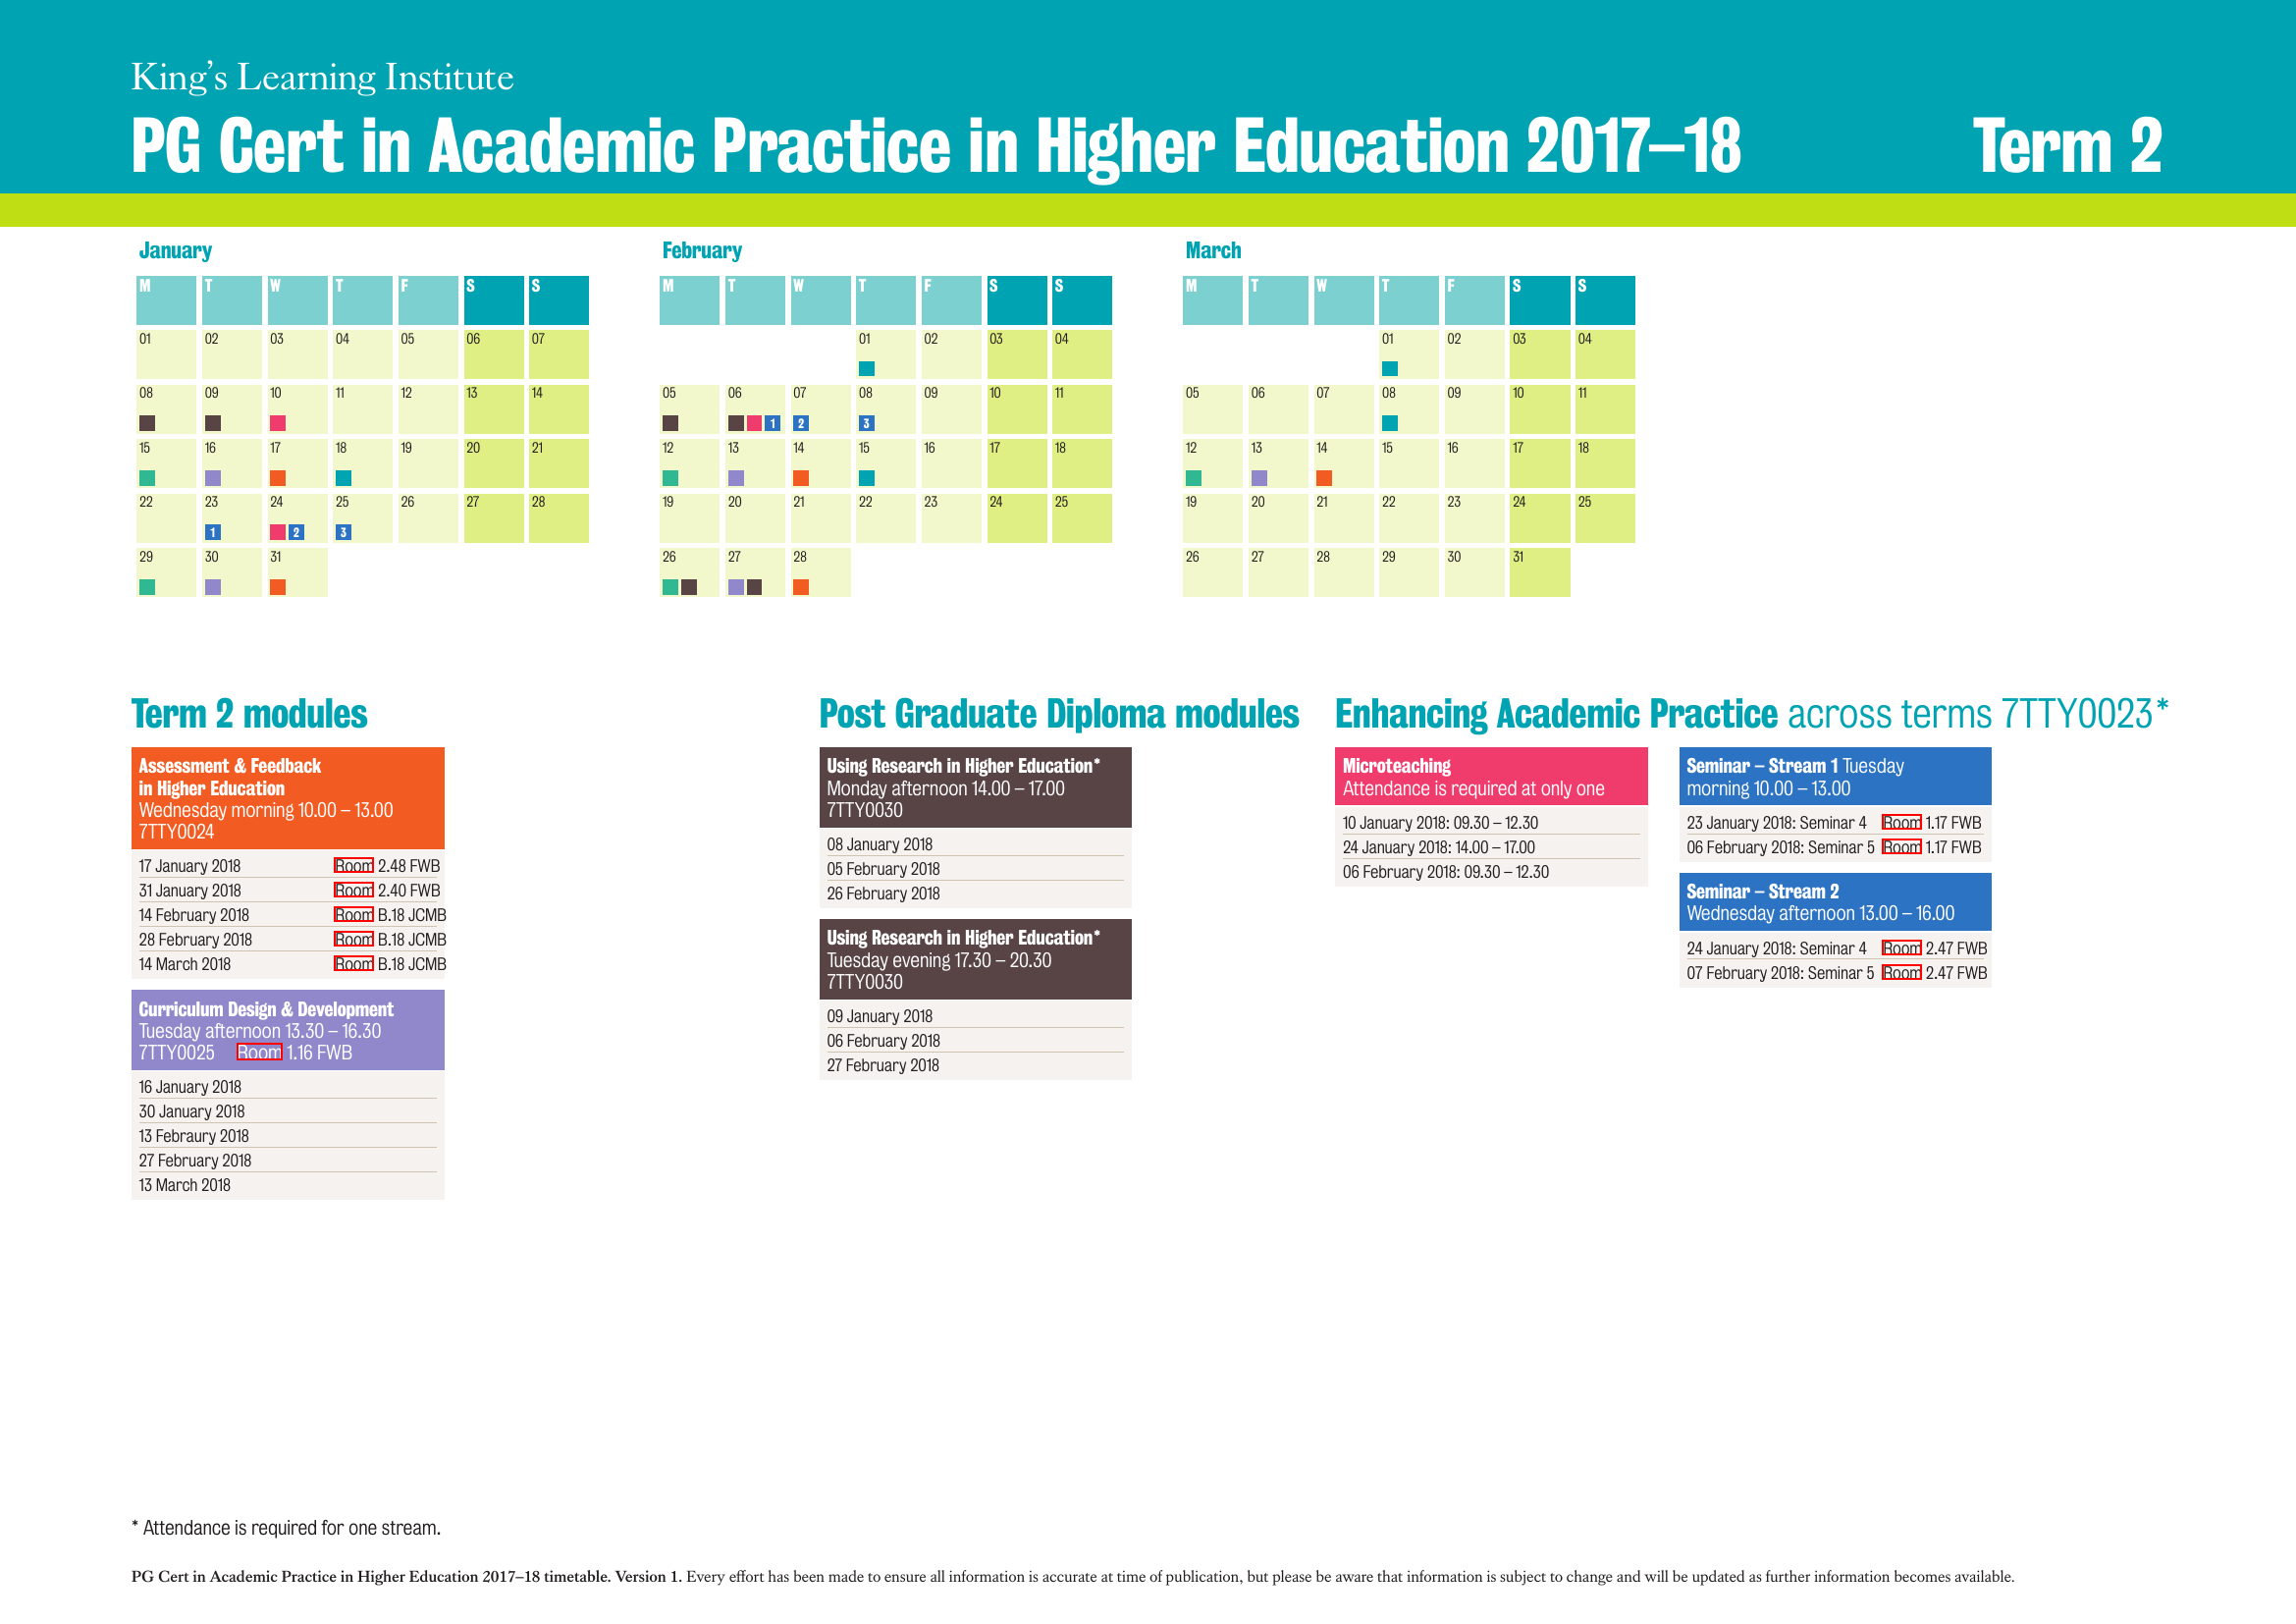

In [11]:
word_occurences.visualize()

## What if you don't want to use PyTorch?

PyTorch gives the most accurate results, but it also uses more compute resources and might be overkill for your use case. This is why Textractor comes built-in with other string matching algorithms.

In [14]:
from textractor.data.constants import SimilarityMetric

word_occurences = document.search_words(
    keyword="Room",
    top_k=15,
    similarity_threshold=0.5,
    similarity_metric=SimilarityMetric.LEVENSHTEIN
)
print("Number of occurences of the word Room in the document = ", len(word_occurences))

Number of occurences of the word Room in the document =  10


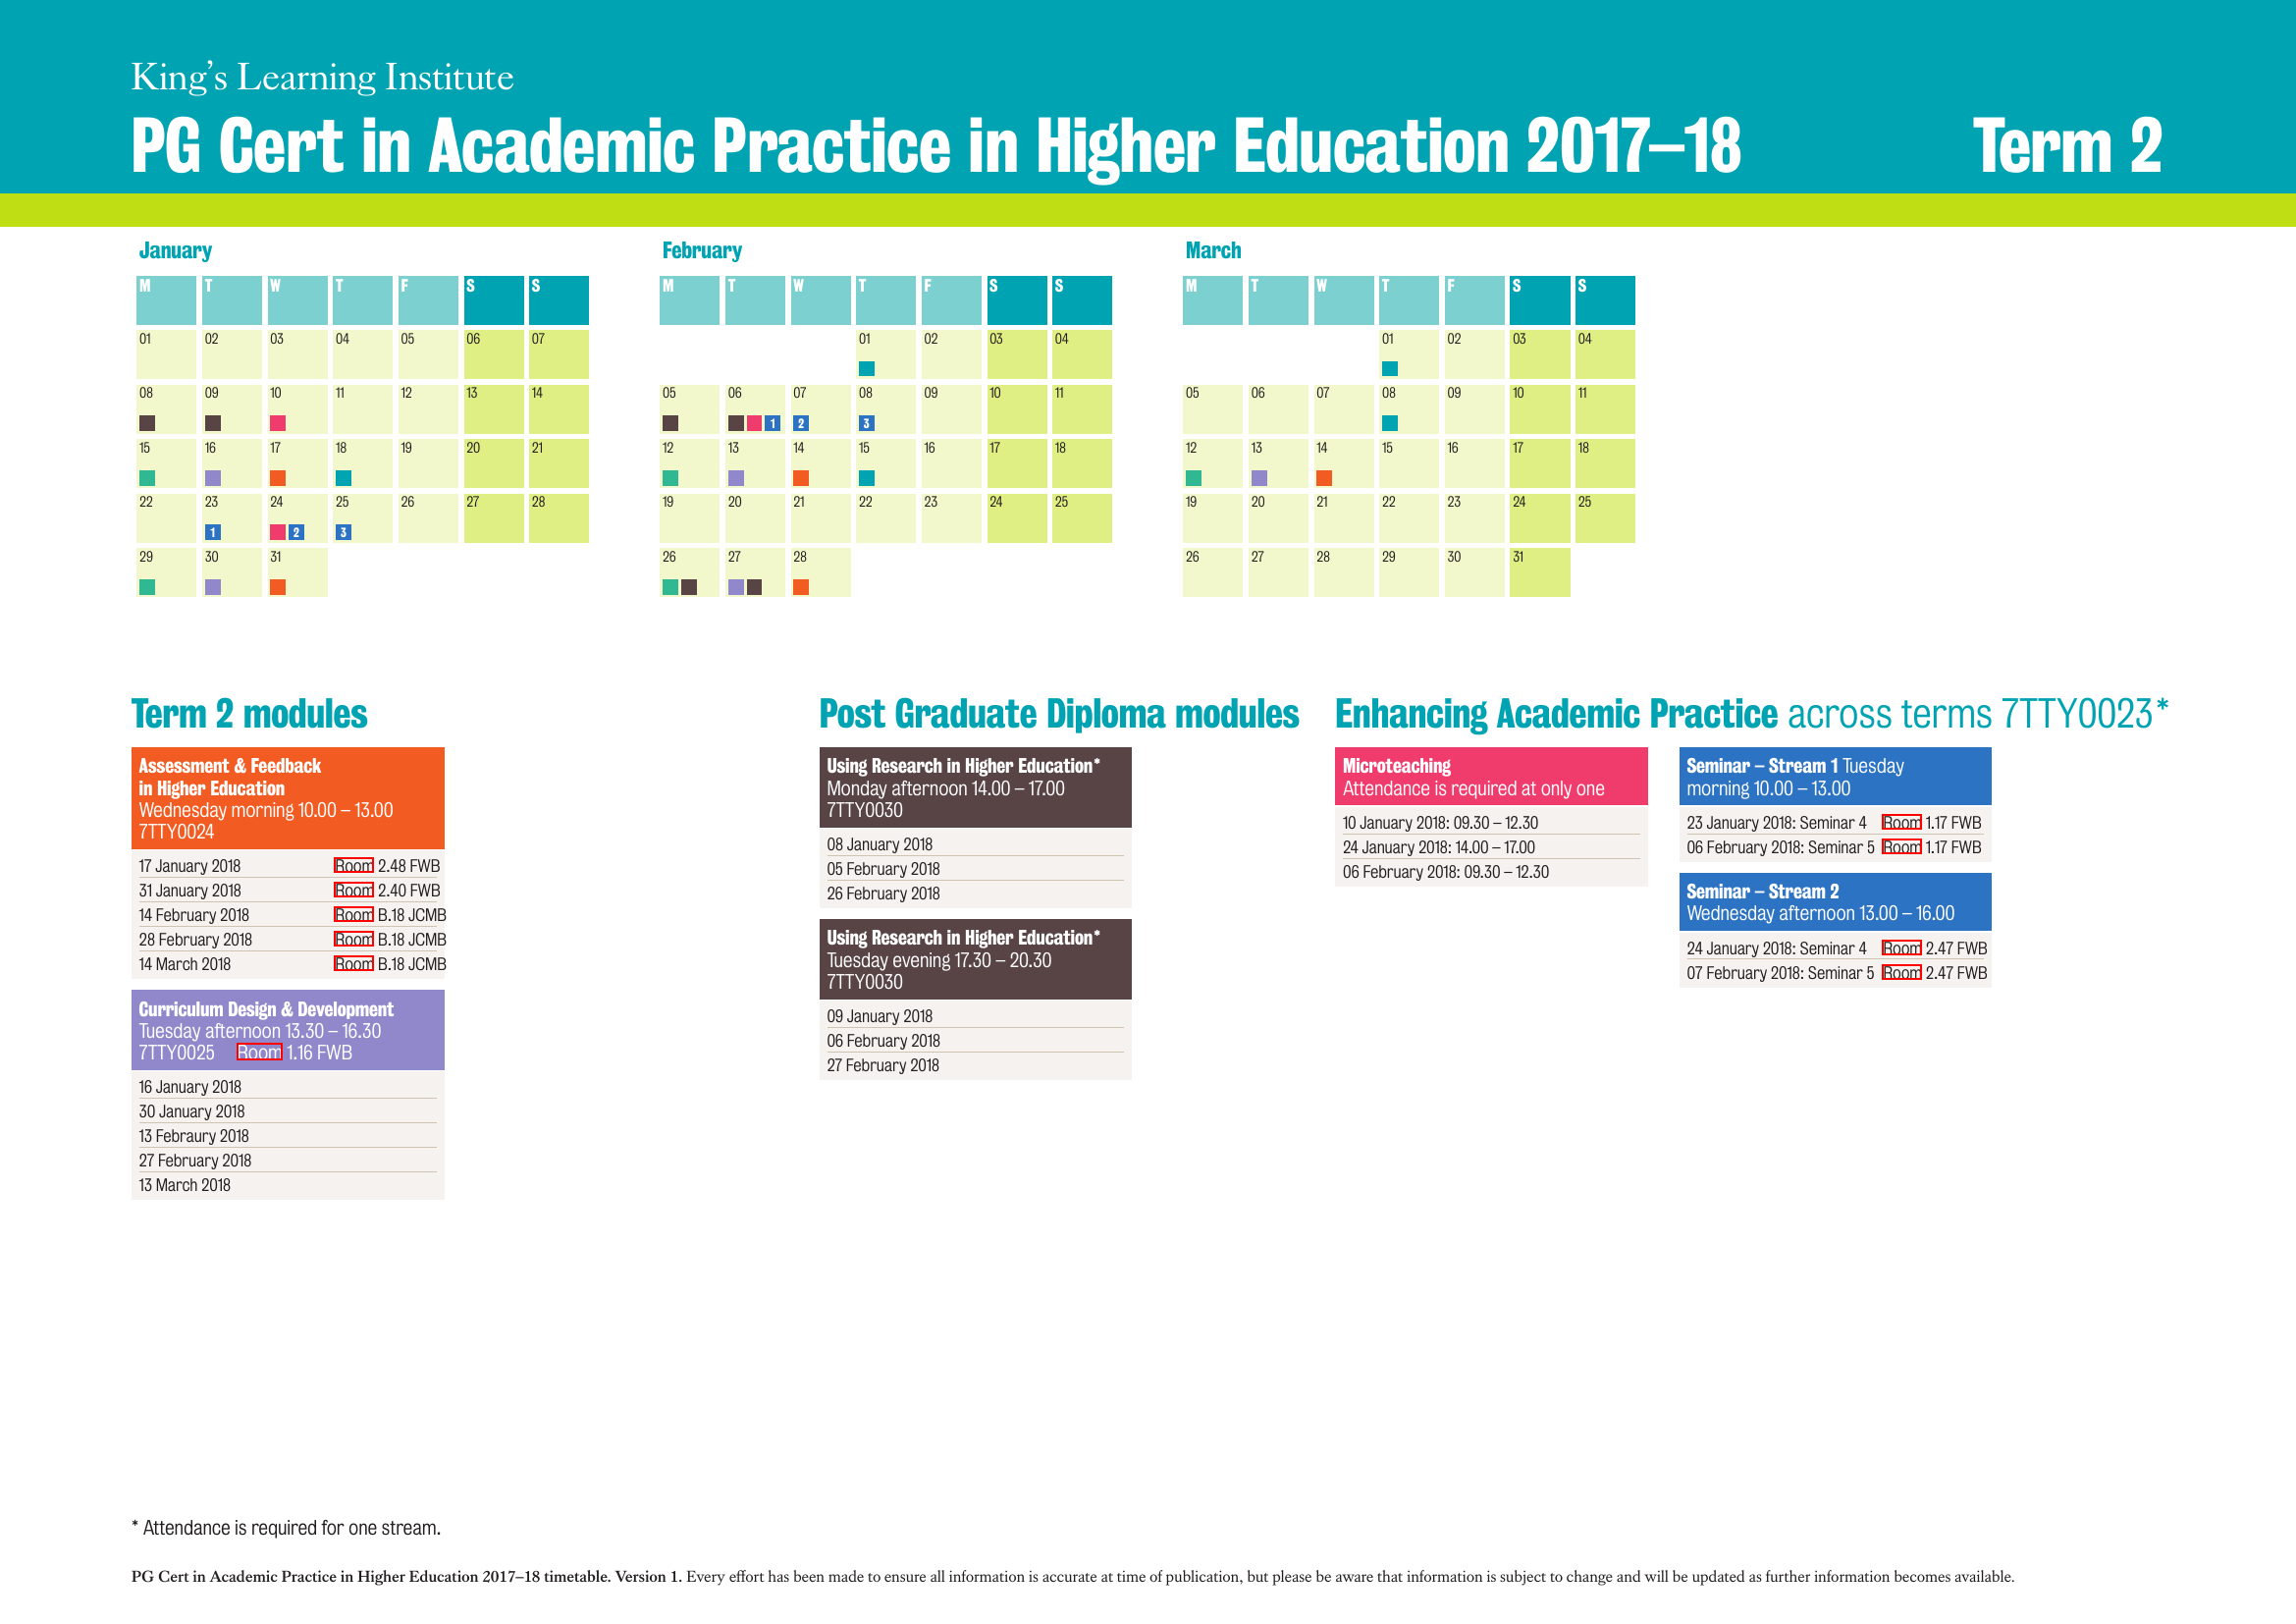

In [15]:
word_occurences.visualize()

## Conclusion

There are many more supported APIs and usecases in Textractor, if this did not address your use case, we encourage you to look at [the other examples](https://aws-samples.github.io/amazon-textract-textractor/examples.html).